# Exploratory Analysis of Diabetes Risk Factors (Solution)

Inspired by Dipanjan Sarkar et al. 2018. [Practical Machine Learning with Python](https://link.springer.com/book/10.1007/978-1-4842-3207-1).

## Overview

This module focuses on exploratory data analysis (EDA) of diabetes risk factors using physiological measurements. We will work with the Pima Indians Diabetes Dataset to investigate patterns, trends, and relationships between various health metrics—such as glucose levels, blood pressure, and BMI—and diabetes outcomes. Through this analysis, we aim to uncover insights that can help identify key risk factors and inform strategies for diabetes prevention and management. This hands-on exploration will provide a deeper understanding of how data-driven approaches can be used to address public health challenges.

## Learning Objectives

- Understand and analyze relationships between different diabetic risk factors
- Apply statistical analysis techniques to diabetic attribute data
  - Perform descriptive statistical analysis
  - Conduct inferential statistical tests like ANOVA
- Create effective visualizations to explore diabetic data patterns
  - Generate univariate distribution plots
  - Produce multivariate relationship plots
- Build analytical frameworks for diabetes risk prediction

### Tasks to complete

- Perform descriptive statistical analysis
- Conduct inferential statistical tests
- Generate univariate distribution visualizations
- Create multivariate relationship plots
- Analyze patterns between diabetic attributes

## Prerequisites

- Python programming environment
- Basic understanding of statistical and machine learning concepts
- Familiarity with common ML libraries

## Get Started

- Please select kernel "conda_tensorflow2_p310" from SageMaker notebook instance.

## Problem Statement

"Can we identify key physiological risk factors for diabetes using clinical measurements?" We'll analyze relationships between health metrics and diabetes outcomes using the CRISP-DM framework.

Dataset source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/14/diabetes)

### Import necessary libraries

In [1]:
# Imports the matplotlib library, specifically the 'matplotlib' module, and assigns it the alias 'mpl' for easier access.
import matplotlib as mpl

# Imports the pyplot module from matplotlib, which provides a collection of functions that make matplotlib work like MATLAB, and assigns it the alias 'plt'.
import matplotlib.pyplot as plt

# Imports the numpy library, which is fundamental for numerical computations in Python, and assigns it the alias 'np'.
import numpy as np

# Imports the pandas library, essential for data manipulation and analysis, particularly using DataFrames, and assigns it the alias 'pd'.
import pandas as pd

# Imports the 'read_csv' function specifically from the 'pandas' library to read CSV files into DataFrames.
from pandas import read_csv

# Imports the seaborn library, which is built on top of matplotlib and provides a high-level interface for creating informative statistical graphics, and assigns it the alias 'sns'.
import seaborn as sns

# Imports the 'stats' module from the scipy library, which contains functions for statistical calculations and tests.
from scipy import stats

# Sets up matplotlib to display plots directly in the output of the Jupyter notebook cells that produce plotting commands.
# The first time run of this command may take a moment. Because Matplotlib is building the font cache
%matplotlib inline

# Pima Indians Diabetes Dataset

## Overview
The **Pima Indians Diabetes Dataset** is a well-known dataset used for binary classification tasks in machine learning, specifically for predicting whether a patient has diabetes based on various medical attributes. The dataset originates from the **National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK)** and focuses on female patients of **Pima Indian heritage**.

## Source
- **Dataset Repository:** [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/12/pima+indians+diabetes)
- **Original Source:** National Institute of Diabetes and Digestive and Kidney Diseases
- **Purpose:** Predicting the onset of diabetes based on diagnostic measurements.

## Dataset Description
The dataset contains **768 samples** with **8 numerical features** and **1 binary target variable** (diabetes outcome).

### **Features:**
1. **Pregnancies** – Number of times pregnant  
2. **Glucose** – Plasma glucose concentration over 2 hours in an oral glucose tolerance test  
3. **BloodPressure** – Diastolic blood pressure (mm Hg)  
4. **SkinThickness** – Triceps skinfold thickness (mm)  
5. **Insulin** – 2-Hour serum insulin (mu U/ml)  
6. **BMI** – Body mass index (weight in kg/(height in m²))  
7. **DiabetesPedigreeFunction** – Diabetes pedigree function (genetic influence)  
8. **Age** – Age of the patient (years)  
9. **Outcome** – Binary classification (1 = Diabetic, 0 = Non-Diabetic)  

## Summary Statistics
- **Total samples:** 768  
- **Diabetes positive cases (Outcome = 1):** ~35%  
- **Diabetes negative cases (Outcome = 0):** ~65%  
- **Missing values:** Some attributes contain zero values which may indicate missing data (e.g., Glucose, BloodPressure).

## Example Usage
This dataset is frequently used in **machine learning** and **statistical modeling** for:
- Logistic Regression
- Decision Trees & Random Forests
- Support Vector Machines (SVM)
- Deep Learning
- Feature Engineering and Imputation Techniques

## References
- UCI Machine Learning Repository: [Pima Indians Diabetes Dataset](https://archive.ics.uci.edu/dataset/12/pima+indians+diabetes)
- Smith, J. W., et al. "Using the ADAP learning algorithm to forecast the onset of diabetes mellitus." In Proceedings of the Annual Symposium on Computer Application in Medical Care. American Medical Informatics Association, 1988.

## Load pima-indians-diabetes dataset

In [2]:
# Load pima-indians-diabetes dataset with the correct structure
# Specify the file path to the dataset
diabetes_data = "../../Data/pima-indians-diabetes.csv"

# Define column names for the dataset based on pima-indians-diabetes.names
# The 'Outcome' column is the target variable (class), indicating diabetes (1) or no diabetes (0)
columns = [
    'Pregnancies',              # Number of times pregnant
    'Glucose',                  # Plasma glucose concentration (2 hours in an oral glucose tolerance test)
    'BloodPressure',            # Diastolic blood pressure (mm Hg)
    'SkinThickness',            # Triceps skinfold thickness (mm)
    'Insulin',                  # 2-Hour serum insulin (mu U/ml)
    'BMI',                      # Body mass index (weight in kg / (height in m)^2)
    'DiabetesPedigreeFunction', # Diabetes pedigree function (a genetic risk score)
    'Age',                      # Age in years
    'Outcome'                   # Target variable: 1 = diabetes, 0 = no diabetes
]

# Load the dataset using pandas' read_csv function
# Parameters:
# - diabetes_data: Path to the CSV file
# - header=None: The file has no header row
# - names=columns: Use the defined column names
# - na_values="?": Treat "?" as missing values
# - sep=',': The file is comma-separated
df = read_csv(
    diabetes_data,
    header=None,
    names=columns,
    na_values="?",
    sep=','
)

## Understand dataset features and values

In [3]:
# Converts numerical 'Outcome' column to categorical 'outcome' column with string labels.
df['outcome'] = df['Outcome'].map({0: 'non-diabetic', 1: 'diabetic'})

# Create age groups
# Defines bins for age groups.
bins = [20, 30, 40, 50, 60, 100]

# Defines labels for age groups.
labels = ['20-29', '30-39', '40-49', '50-59', '60+']

# Creates 'age_group' column by categorizing 'Age' into defined bins with labels.
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Prints concise summary of DataFrame, including column names, types, non-null values, and memory usage.
print(df.info())

# Displays the first 5 rows of the DataFrame to inspect the data.
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   outcome                   768 non-null    object  
 10  age_group                 768 non-null    category
dtypes: category(1), float64(2), int64(7), object(1)
memory usage: 61.1+ KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outcome,age_group
0,6,148,72,35,0,33.6,0.627,50,1,diabetic,40-49
1,1,85,66,29,0,26.6,0.351,31,0,non-diabetic,30-39
2,8,183,64,0,0,23.3,0.672,32,1,diabetic,30-39
3,1,89,66,23,94,28.1,0.167,21,0,non-diabetic,20-29
4,0,137,40,35,168,43.1,2.288,33,1,diabetic,30-39


## Domain Knowledge

### Key Health Indicators

- **Pregnancies:** Number of times pregnant
- **Glucose:** Plasma glucose concentration (mg/dL)
- **BloodPressure:** Diastolic blood pressure (mm Hg)
- **SkinThickness:** Triceps skin fold thickness (mm)
- **Insulin:** 2-Hour serum insulin (mu U/ml)
- **BMI:** Body mass index (kg/m²)
- **DiabetesPedigreeFunction:** Diabetes risk genetic score
- **Age:** Years
- **Outcome:** Diabetes diagnosis (0 = Negative, 1 = Positive)

## Exploratory Data Analysis
### Descriptive Statistics

In [4]:
# Summary statistics by diabetes outcome
# Creates a DataFrame 'diabetic' containing data for patients with Outcome=1 (diabetic).
diabetic = df[df['Outcome'] == 1]

# Creates a DataFrame 'non_diabetic' containing data for patients with Outcome=0 (non-diabetic).
non_diabetic = df[df['Outcome'] == 0]

# Defines a list of feature names 'subset_vars' for statistical analysis.
subset_vars = ['Glucose', 'BMI', 'Age', 'BloodPressure', 'Insulin']

# Calculates descriptive statistics for 'subset_vars' in 'diabetic' DataFrame and rounds to 2 decimal places.
stats_diabetic = round(diabetic[subset_vars].describe(), 2)

# Calculates descriptive statistics for 'subset_vars' in 'non_diabetic' DataFrame and rounds to 2 decimal places.
stats_non_diabetic = round(non_diabetic[subset_vars].describe(), 2)

# Concatenates 'stats_diabetic' and 'stats_non_diabetic' DataFrames side-by-side (axis=1).
pd.concat([stats_diabetic, stats_non_diabetic],
          axis=1,
          # Sets column keys for the concatenated DataFrame to 'Diabetic Patients' and 'Non-Diabetic Patients'.
          keys=['Diabetic Patients', 'Non-Diabetic Patients'])


Diabetic Patients                                        \
                Glucose     BMI     Age BloodPressure Insulin   
count            268.00  268.00  268.00        268.00  268.00   
mean             141.26   35.14   37.07         70.82  100.34   
std               31.94    7.26   10.97         21.49  138.69   
min                0.00    0.00   21.00          0.00    0.00   
25%              119.00   30.80   28.00         66.00    0.00   
50%              140.00   34.25   36.00         74.00    0.00   
75%              167.00   38.78   44.00         82.00  167.25   
max              199.00   67.10   70.00        114.00  846.00   

      Non-Diabetic Patients                                        
                    Glucose     BMI     Age BloodPressure Insulin  
count                500.00  500.00  500.00        500.00  500.00  
mean                 109.98   30.30   31.19         68.18   68.79  
std                   26.14    7.69   11.67         18.06   98.87  
min                    0.00    0.00   21.00          0.00    0.00  
25%                   93.00   25.40   23.00         62.00    0.00  
50%                  107.00   30.05   27.00         70.00   39.00  
75%                  125.00   35.30   37.00         78.00  105.00  
max                  197.00   57.30   81.00        122.00  744.00

### Inferential Statistics

#### ANOVA

A great statistical model to prove or disprove the difference in mean among subsets of data is to use
the one-way ANOVA test. ANOVA stands for “analysis of variance,” which is a nifty statistical model and can
be used to analyze statistically significant differences among means or averages of various groups. This is
basically achieved using a statistical test that helps us determine whether or not the means of several groups
are equal.

- The null hypothesis $H_0$ indicates that the group means for the various
  groups are not very different from each other based on statistical significance levels.
- The alternative
  hypotheses, $H_A$, tells us that there exists at least two group means that are statistically significantly different
  from each other.

Usually the F-statistic and the associated p-value from it is used to determine the statistical
significance. Typically a p-value less than 0.05 is taken to be a statistically significant result where we reject
the null hypothesis in favor of the original.

In [5]:
# Performs one-way ANOVA test to compare Glucose levels across different age groups.
F, p = stats.f_oneway(
    # Selects 'Glucose' values for age group '20-29' from DataFrame 'df'.
    df[df['age_group'] == '20-29']['Glucose'],
    
    # Selects 'Glucose' values for age group '30-39' from DataFrame 'df'.
    df[df['age_group'] == '30-39']['Glucose'],
    
    # Selects 'Glucose' values for age group '40-49' from DataFrame 'df'.
    df[df['age_group'] == '40-49']['Glucose']
)
# Prints a descriptive title for the ANOVA test being performed.
print("ANOVA for Glucose Levels Across Age Groups")

# Prints the F statistic and p-value from the ANOVA test, formatted to 2 and 4 decimal places respectively.
print(f"F Statistic: {F:.2f}\tp-value: {p:.4f}")

ANOVA for Glucose Levels Across Age Groups
F Statistic: 11.35	p-value: 0.0000


### Interpreting the Output:
- F-statistic = 11.35: A higher F-value suggests stronger evidence that at least one group's mean glucose level differs from the others.
- p-value = 0.0000 (< 0.05): This is extremely low, indicating that the differences in glucose levels across age groups are statistically significant at the 95% confidence level.

Since the p-value is very small (close to 0), we reject the null hypothesis (H₀), which states that all age groups have the same mean glucose levels. This means at least one age group has significantly different glucose levels compared to the others.

### Univariate Analysis

Univariate analysis focuses on examining **one variable at a time**, without considering relationships or correlations between multiple variables. This type of analysis is often the first step in understanding the distribution, central tendency, and spread of individual features in a dataset.

The simplest and most effective way to visualize univariate data is by creating **histograms**. Histograms provide a graphical representation of the distribution of a single variable, making it easy to identify patterns such as skewness, outliers, or clusters. By analyzing each variable independently, univariate analysis helps build a foundational understanding of the dataset before moving on to more complex multivariate techniques.

Text(0.5, 1.02, 'Health Metric Distributions by Diabetes Status')

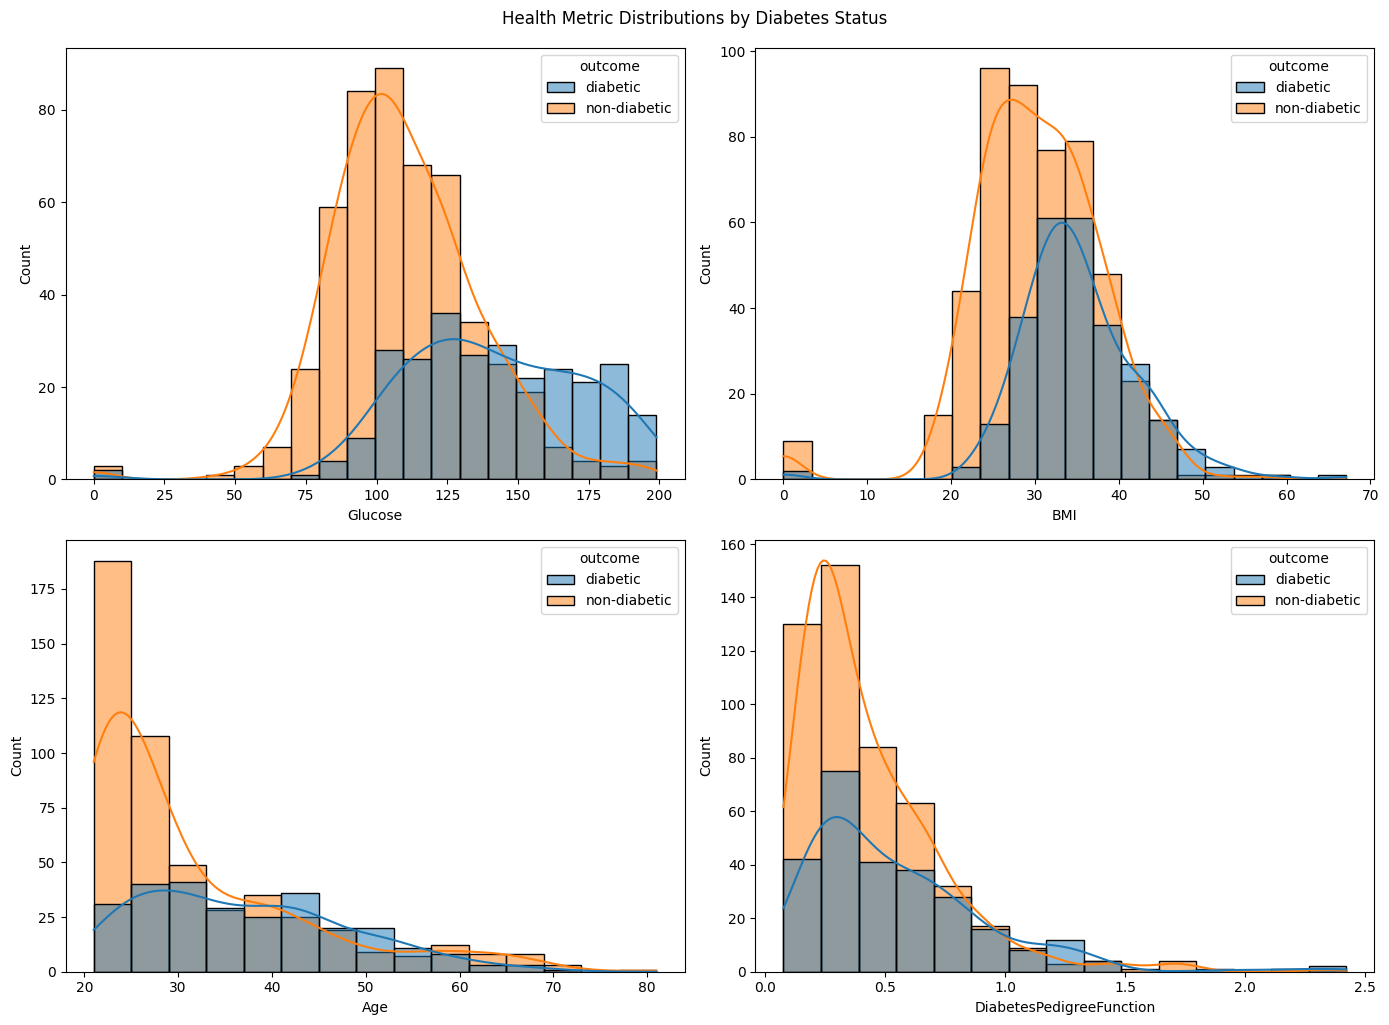

In [6]:
# Create a figure and a set of subplots with 2 rows and 2 columns, setting the figure size to 14x10 inches.
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Create a histogram for 'Glucose' feature, colored by 'outcome', with 20 bins, placing it in the top-left subplot (axes[0,0]) and showing Kernel Density Estimate (KDE).
sns.histplot(df, x='Glucose', hue='outcome', bins=20, ax=axes[0,0], kde=True)

# Create a histogram for 'BMI' feature, colored by 'outcome', with 20 bins, placing it in the top-right subplot (axes[0,1]) and showing Kernel Density Estimate (KDE).
sns.histplot(df, x='BMI', hue='outcome', bins=20, ax=axes[0,1], kde=True)

# Create a histogram for 'Age' feature, colored by 'outcome', with 15 bins, placing it in the bottom-left subplot (axes[1,0]) and showing Kernel Density Estimate (KDE).
sns.histplot(df, x='Age', hue='outcome', bins=15, ax=axes[1,0], kde=True)

# Create a histogram for 'DiabetesPedigreeFunction' feature, colored by 'outcome', with 15 bins, placing it in the bottom-right subplot (axes[1,1]) and showing Kernel Density Estimate (KDE).
sns.histplot(df, x='DiabetesPedigreeFunction', hue='outcome', bins=15, ax=axes[1,1], kde=True)

# Adjust subplot parameters to provide reasonable spacing between subplots.
plt.tight_layout()

# Set the suptitle (overall title) for the figure to "Health Metric Distributions by Diabetes Status", adjusting vertical position for better layout.
plt.suptitle("Health Metric Distributions by Diabetes Status", y=1.02)

### Health Metric Distributions by Diabetes Status

This figure visualizes the distribution of four key health metrics (**Glucose, BMI, Age, and Diabetes Pedigree Function**) for diabetic and non-diabetic individuals. Each subplot represents the histogram along with a Kernel Density Estimation (KDE) plot.

#### **Understanding the Four Subplots:**
Each plot compares the metric distributions for:
- **Diabetic individuals** (blue bars & KDE line)
- **Non-diabetic individuals** (orange bars & KDE line)

##### **1. Glucose Distribution (Top-left)**
- **Non-diabetics:** Peak around **100 mg/dL**.
- **Diabetics:** Wider distribution, with many having glucose levels **above 120 mg/dL**.
- **Insight:** Higher glucose levels are more common in diabetics.

##### **2. BMI (Body Mass Index) Distribution (Top-right)**
- Both groups have a normal-like distribution.
- **Diabetics:** Slightly higher BMI values.
- **Non-diabetics:** Peak BMI is **25-30**, whereas diabetics have a broader range.
- **Insight:** Higher BMI is associated with diabetes risk.

##### **3. Age Distribution (Bottom-left)**
- **Non-diabetics:** Sharp peak in the **20-30 age range**.
- **Diabetics:** More evenly distributed.
- **Insight:** **Diabetes risk increases with age**.

##### **4. Diabetes Pedigree Function (DPF) Distribution (Bottom-right)**
- **Non-diabetics:** Mostly have a **low DPF (<0.5)**.
- **Diabetics:** More spread, meaning some have a strong genetic predisposition.
- **Insight:** Genetics plays a role but is not the sole determinant of diabetes.

#### **Key Takeaways:**
- Higher glucose levels, BMI, and age are associated with diabetes.
- Non-diabetics tend to be younger with lower glucose levels.
- Genetics (DPF) can contribute, but lifestyle factors (BMI, age) also play a role.


### Multivariate Analysis

**Multivariate analysis** is a statistical technique used to analyze data that involves **multiple variables** simultaneously. Unlike univariate analysis, which examines one variable at a time, or bivariate analysis, which examines two variables, multivariate analysis allows researchers to explore the relationships, patterns, and interactions among three or more variables. This approach is particularly useful for understanding complex datasets where variables may influence each other or collectively impact an outcome.

- **Common Goals of Multivariate Analysis**:
    - **Identify Relationships**: Determine how variables are related to each other (e.g., correlations, dependencies).
    - **Reduce Dimensionality**: Simplify data by identifying the most important variables (e.g., using Principal Component Analysis).
    - **Classify or Predict**: Group data into categories or predict outcomes based on multiple variables.
    - **Uncover Patterns**: Detect hidden trends or interactions that are not apparent in simpler analyses.

In the following code blocks, multivariate analysis is used to explore the relationships between various diabetes risk factors in the Pima Indians Diabetes Dataset.

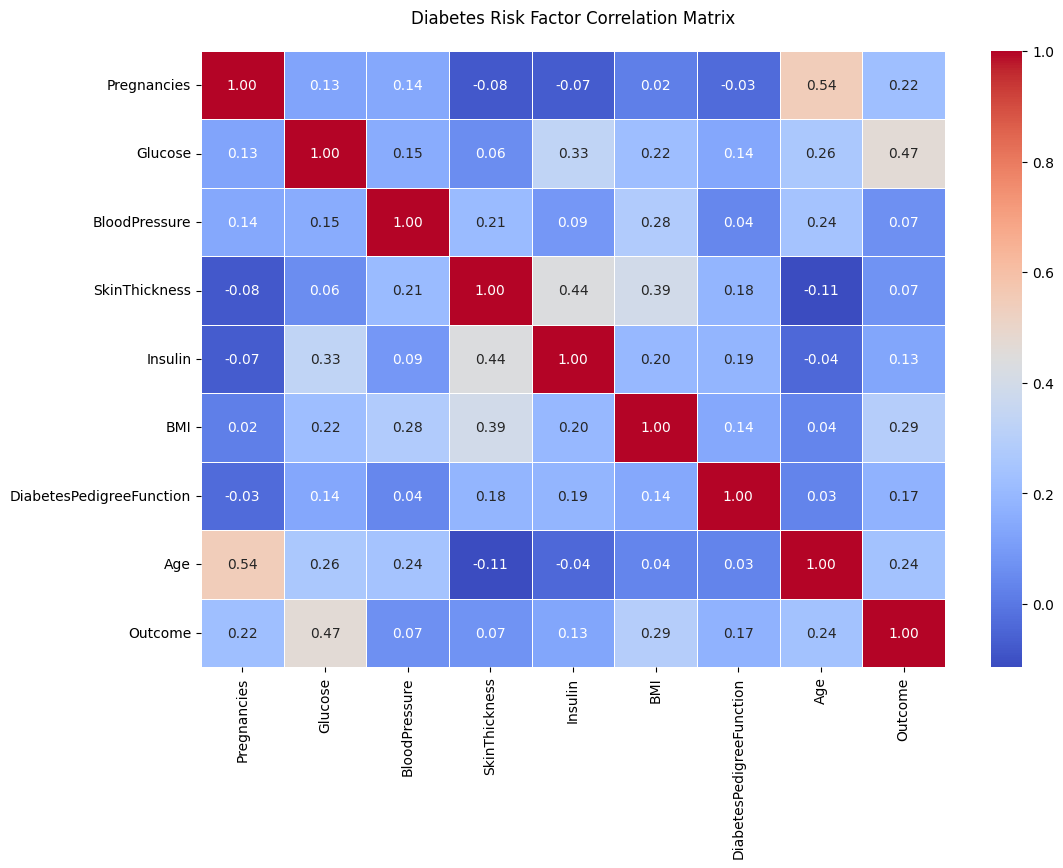

In [7]:
# Selects only numeric columns from the DataFrame 'df' and stores them in 'numeric_df'.
numeric_df = df.select_dtypes(include=[np.number])

# Calculates the pairwise correlation of columns for the 'numeric_df' DataFrame.
corr = numeric_df.corr()

# Set the figure size for the heatmap to 12x8 inches.
plt.figure(figsize=(12, 8))

# Creates a heatmap to visualize the correlation matrix 'corr'.
# 'annot=True' displays correlation values on the heatmap.
# 'cmap='coolwarm'' sets the color scheme to 'coolwarm'.
# 'fmt=".2f"' formats the annotation values to two decimal places.
# 'annot_kws={'size': 10}' sets the font size of annotations.
# 'linewidths=0.5' sets the width of lines that divide heatmap cells.
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 10}, linewidths=0.5)

# Sets the title of the heatmap plot to "Diabetes Risk Factor Correlation Matrix" and adds padding below the title.
plt.title("Diabetes Risk Factor Correlation Matrix", pad=20)

# Displays the generated heatmap plot.
plt.show()

### **Diabetes Risk Factor Correlation Matrix**

#### **Understanding the Heatmap**
This heatmap represents the **correlation coefficients** between different numeric variables in the dataset. The correlation values range from **-1 to 1**:
- **1.0 (Red):** Strong positive correlation (variables increase together)
- **0.0 (White):** No correlation
- **-1.0 (Blue):** Strong negative correlation (one increases, the other decreases)

#### **Key Observations**
- **Glucose & Outcome (0.47):** Moderate positive correlation. Higher glucose levels are associated with diabetes.
- **BMI & Outcome (0.29):** Higher BMI tends to correlate with diabetes risk.
- **Age & Outcome (0.24):** Older individuals are slightly more likely to be diabetic.
- **Pregnancies & Age (0.54):** Older individuals tend to have more pregnancies.
- **SkinThickness & Insulin (0.44):** These variables are related, likely due to their link with body fat and metabolic function.
- **Weak Correlations:** Blood Pressure, Skin Thickness, and Diabetes Pedigree Function have lower correlations with diabetes outcome.

#### **Insights**
- Glucose is the strongest predictor of diabetes in this dataset.
- BMI and Age also contribute but to a lesser extent.
- Other factors like Blood Pressure and Skin Thickness show weak relationships with diabetes.

This analysis helps identify key risk factors and their relationships, useful for feature selection in predictive modeling.


### Pairwise relationships of Diabetes Risk Factor

Text(0.5, 1.02, 'Diabetes Risk Factor Relationships')

<Figure size 1200x800 with 0 Axes>

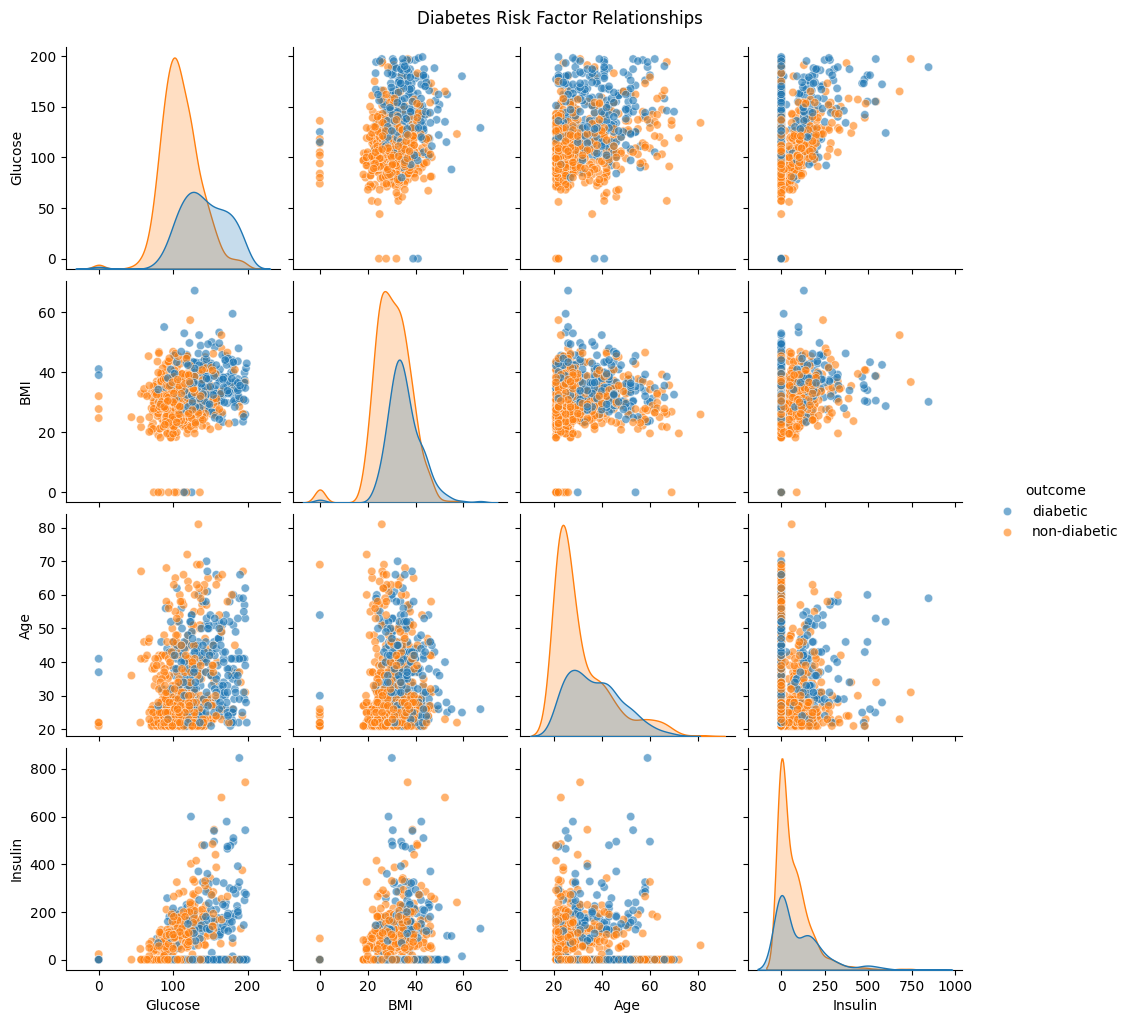

In [8]:
# Set the figure size for the pairplot to 12x8 inches.
plt.figure(figsize=(12,8))

# Create a pairplot using seaborn to visualize pairwise relationships between 'Glucose', 'BMI', 'Age', and 'Insulin' features, colored by 'outcome', with transparency alpha=0.6.
sns.pairplot(df, vars=['Glucose', 'BMI', 'Age', 'Insulin'],
             hue='outcome', plot_kws={'alpha':0.6})

# Set the suptitle (overall title) for the pairplot to "Diabetes Risk Factor Relationships", adjusting vertical position for better layout.
plt.suptitle("Diabetes Risk Factor Relationships", y=1.02)

### **Diabetes Risk Factor Relationships**

#### **Understanding the Pairplot**
This pairplot visualizes **pairwise relationships** between key health metrics (`Glucose`, `BMI`, `Age`, and `Insulin`) while distinguishing between **diabetic** and **non-diabetic** individuals.

- **Diagonal Plots (Kernel Density Estimation - KDE)**  
  - These show the distribution of each variable.  
  - **Glucose:** Higher glucose levels are more frequent in diabetics.  
  - **BMI:** The distribution is similar, but diabetics tend to have a slightly higher BMI.  
  - **Age:** Diabetics are more evenly spread across different ages, while non-diabetics cluster at younger ages.  
  - **Insulin:** Skewed distribution with many low values.

- **Scatter Plots (Off-Diagonal)**
  - Each point represents an individual, color-coded by diabetes status.  
  - **Glucose vs. Insulin:** Some correlation—higher glucose is often paired with higher insulin.  
  - **Age vs. Glucose:** Weak correlation; diabetes occurs at various ages, but older individuals are at higher risk.  
  - **BMI vs. Insulin:** Some clustering, but no strong trend.  

#### **Insights**
- **Glucose is the strongest distinguishing factor** between diabetic and non-diabetic groups.  
- **Insulin values show extreme variability**, with some very high outliers.  
- **Age and BMI alone are not clear separators**, but they contribute to diabetes risk.  

This visualization helps explore feature relationships and identify patterns useful for machine learning models.


## Conclusion

Through this analysis, we learned:

- Perform EDA on the Pima Indians Diabetes Dataset to identify diabetes risk factors.
- Conduct statistical analysis:
    - Descriptive statistics to compare health metrics (e.g., glucose, BMI).
    - Inferential statistics (ANOVA) to test differences in glucose levels across age groups.
- Create visualizations:
    - Univariate histograms with KDE for health metric distributions.
    - Multivariate correlation heatmaps and pairplots to explore relationships.
- Analyze patterns in diabetic attributes (e.g., glucose, BMI, age as key risk factors).
- Apply the CRISP-DM framework to structure analysis for diabetes risk prediction.
- Use Python libraries (pandas, seaborn, scipy) for data manipulation, analysis, and visualization.

## Clean up

Remember to shut down your Jupyter Notebook environment and delete any unnecessary files or resources once you've completed the tutorial.